In [1]:
import pandas as pd
import numpy as np
import string # this will be used to remouve puntuation
import os
import nltk
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import string


https://widdowquinn.github.io/Teaching-SWC-Lessons/python/2017-05-18-standrews/extras/nltk_example.html

In [2]:
#Let's set the directory 

PATH = "D:\\University of Trieste\\project\\Sueza_project\\"
DATADIR = os.path.join(PATH,"Data")
CATEGORIES = ["Bassa", "Ewondo","Yemba"]

In [3]:
for category in CATEGORIES : 
    path = os.path.join(DATADIR,category) # path to the language
    for text in os.listdir(path):
        corpus = PlaintextCorpusReader(path,text)
        break
    break
#Explore the corpus  
corpus.raw()

'Sôhô lô hola mè !\r\nSôhô lô hola mè !\r\nSôhô lô hola mè !\r\nWènu u yé mapubi mèm\r\nSôhô lô hola mè !\r\nMa bégués wè i kèl\r\nSôhô lô hola mè !\r\nA nyambè wèm, Wènu u yé mapubi mèm\r\nMa bégués wè i kèl\r\nA nyambè wèm. Wènu u yé mapubi mèm\r\nNyambè kônangô\r\nHèmblè bon bôn ba nlondol wè !\r\nMè humul wè mabôn i si. A Djob'

### Extracting Words

In [4]:
#extract words from the corpos
print("Words in the corpus:",corpus.words())

l= corpus.words()

Words in the corpus: ['Sôhô', 'lô', 'hola', 'mè', '!', 'Sôhô', 'lô', 'hola', ...]


### Remove punctuation 

In [5]:
stripped = [w for w in corpus.words() if w not in string.punctuation ]

In [6]:
print(stripped)

['Sôhô', 'lô', 'hola', 'mè', 'Sôhô', 'lô', 'hola', 'mè', 'Sôhô', 'lô', 'hola', 'mè', 'Wènu', 'u', 'yé', 'mapubi', 'mèm', 'Sôhô', 'lô', 'hola', 'mè', 'Ma', 'bégués', 'wè', 'i', 'kèl', 'Sôhô', 'lô', 'hola', 'mè', 'A', 'nyambè', 'wèm', 'Wènu', 'u', 'yé', 'mapubi', 'mèm', 'Ma', 'bégués', 'wè', 'i', 'kèl', 'A', 'nyambè', 'wèm', 'Wènu', 'u', 'yé', 'mapubi', 'mèm', 'Nyambè', 'kônangô', 'Hèmblè', 'bon', 'bôn', 'ba', 'nlondol', 'wè', 'Mè', 'humul', 'wè', 'mabôn', 'i', 'si', 'A', 'Djob']


### Analyze the corpus

In [7]:
freq = nltk.FreqDist(stripped)
#common words 
print("Common Words:", freq.most_common(100))
#specific words 
print("Specific Word: ", freq.get("Sôhô"))

Common Words: [('Sôhô', 5), ('lô', 5), ('hola', 5), ('mè', 5), ('wè', 4), ('Wènu', 3), ('u', 3), ('yé', 3), ('mapubi', 3), ('mèm', 3), ('i', 3), ('A', 3), ('Ma', 2), ('bégués', 2), ('kèl', 2), ('nyambè', 2), ('wèm', 2), ('Nyambè', 1), ('kônangô', 1), ('Hèmblè', 1), ('bon', 1), ('bôn', 1), ('ba', 1), ('nlondol', 1), ('Mè', 1), ('humul', 1), ('mabôn', 1), ('si', 1), ('Djob', 1)]
Specific Word:  5


### Extract contain on many corpus and save as dictionary.   

In [8]:
Corpus = {}
for category in CATEGORIES : 
    path = os.path.join(DATADIR,category) # path to the language
    Corpus[category] =[]
    for text in os.listdir(path):
        corpus = PlaintextCorpusReader(path,text)
        Corpus[category].append([w for w in corpus.words() if w not in string.punctuation ])
    

In [9]:

import itertools
data={}
CATEGORIES = ["Bassa", "Ewondo","Yemba"]
for i in CATEGORIES:
    data[i] =list(itertools.chain.from_iterable(Corpus[i]))

## Let's count the number of occurance of each unique word

In [10]:
freq = nltk.FreqDist(data["Bassa"])
freq

FreqDist({'Sôhô': 5, 'lô': 5, 'hola': 5, 'mè': 5, 'wè': 4, 'Wènu': 3, 'u': 3, 'yé': 3, 'mapubi': 3, 'mèm': 3, ...})

In [11]:
from collections import Counter 

In [12]:
mot_dict= {}
frame = {}

for i in CATEGORIES:
    u= np.unique(data[i])
    counter = Counter(data[i])
    compt = list()
    for string in u: 
        compt.append(counter[string])
    dat = {'word': u, 'count': compt}  
  
    # Create DataFrame  
    frame[i]= pd.DataFrame(dat) 
    mot_dict[i]=list([len(u)])
    u=np.array([])
print(mot_dict)

{'Bassa': [29], 'Ewondo': [154], 'Yemba': [873]}


In [13]:
mot_dict=pd.DataFrame(mot_dict)
mot_dict

,Bassa,Ewondo,Yemba
0,29,154,873


In [14]:

u= np.unique(data["Yemba"])
counter = Counter(data["Yemba"])
compt = list()
for string in u: 
    compt.append(counter[string])
    

In [15]:
  
# Create DataFrame  
df = frame["Yemba"] 
df = df.sort_values(by=['count'],ascending=False)
df

,word,count
839,́,570
834,̀,160
853,̄,156
129,a,129
778,ŋ,95
...,...,...
340,lesoŋle,1
341,leswhi,1
342,leswhiine,1
343,leswiŋ,1


# Let's visualize the tokens frenquency 

A method for visualizing the frequency of tokens within and across corpora is frequency distribution

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)


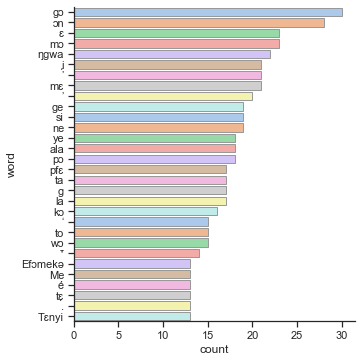

In [17]:
sns.catplot(x="count", y="word", kind="bar",palette="pastel", edgecolor=".6", data=df[20:50])

## Visualized word with more than 4 count

We plot the word that have more than 4 occurance in the previous text

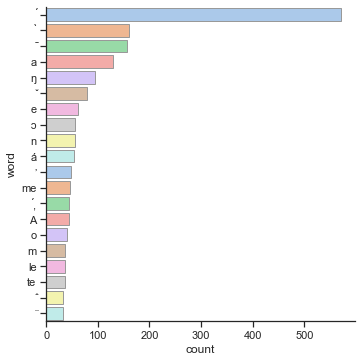

In [18]:
df = df.sort_values(by=['count'],ascending=False)

gh=df.head(20)
sns.catplot(x="count", y="word", kind="bar",palette="pastel", edgecolor=".6", data=gh)

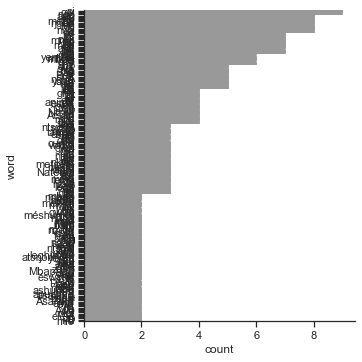

In [19]:
gh2 = df[df['count']>1]
gh2=gh2[gh2['count']<10]
gh2 = gh2.sort_values(by=['count'],ascending=False)
sns.catplot(x="count", y="word", kind="bar",palette="pastel", edgecolor=".6", data=gh2)

In [20]:
from wordcloud import WordCloud
# pip install wordcloud

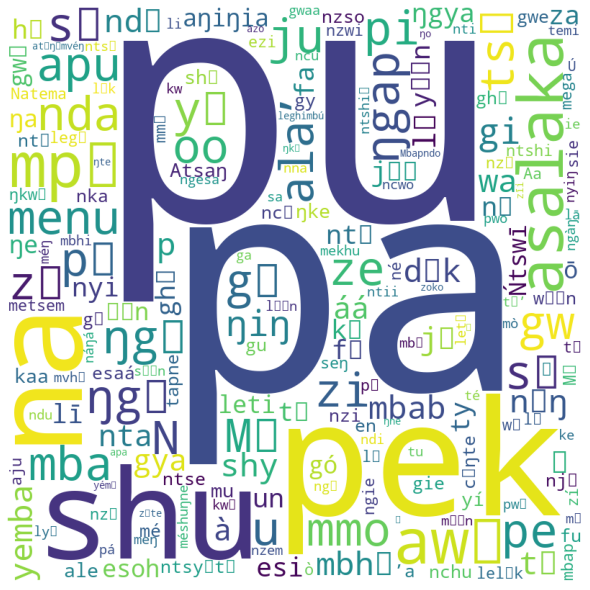

In [21]:
comment_words = ''
comment_words += " ".join(gh2["word"])+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

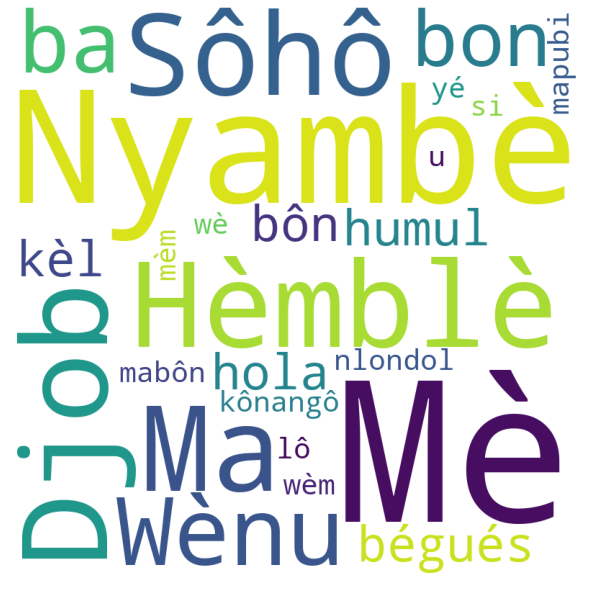

In [22]:
comment_words = ''
comment_words += " ".join(frame["Bassa"]["word"])+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

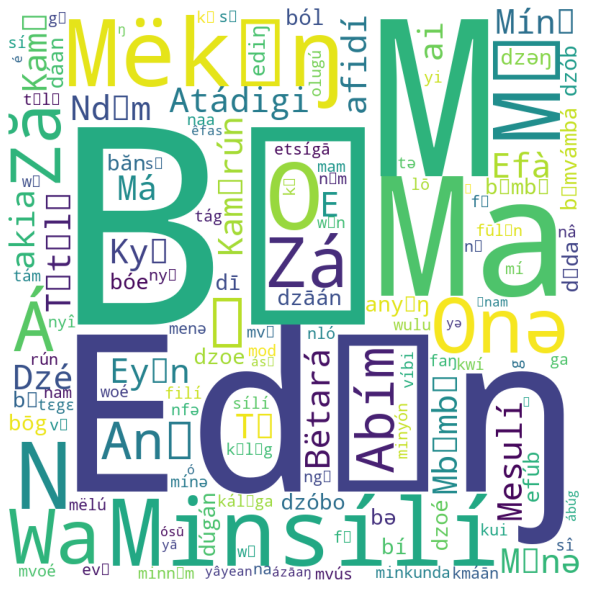

In [23]:
comment_words = ''
comment_words += " ".join(frame["Ewondo"]["word"])+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

#  Let's visualized the distribution of word we have already collected 

## Let's transform colunm as raw 

In [24]:
mot_dict

,Bassa,Ewondo,Yemba
0,29,154,873


In [25]:
mt = mot_dict.melt()
mt.columns = ["Languages","Number_of_word_record"]
mt

,Languages,Number_of_word_record
0,Bassa,29
1,Ewondo,154
2,Yemba,873


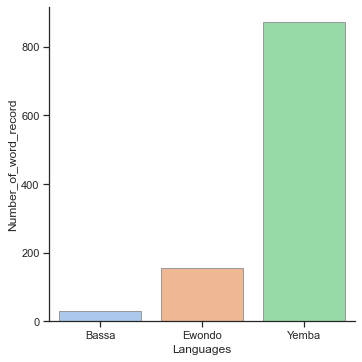

In [26]:
sns.catplot(x="Languages", y="Number_of_word_record", kind="bar",palette="pastel", edgecolor=".6", data=mt)

# Let's save unique word in csv file

This will be use for word label process 

In [27]:
frame["Ewondo"]["word"].to_csv(r"D:\University of Trieste\project\Sueza_project\collected_word\Ewondo_dict.csv",index = False,encoding='utf-8-sig')
frame["Yemba"]["word"].to_csv(r"D:\University of Trieste\project\Sueza_project\collected_word\Yemba_dict.csv",index = False,encoding='utf-8-sig')
frame["Bassa"]["word"].to_csv(r"D:\University of Trieste\project\Sueza_project\collected_word\Bassa_dict.csv",index = False,encoding='utf-8-sig')